# **Assignment 8**



# Introduction

For this assignment, I have selected the 2018 squirel census data.  The data is available on NYC Open Data site.  For the exercise, this data offered interesting observations for analysis.

The source describes the data as:  

***The Squirrel Census is a multimedia science, design, and storytelling project focusing on the Eastern gray (Sciurus carolinensis). They count squirrels and present their findings to the public. This table contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.***
:

The data is sourced from https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw


#Import the Modules & Data from my github repo


In [149]:
# import all modules for this assignment
import pandas as pd
import numpy as np
from google.colab import data_table
import matplotlib.pyplot as plt
import seaborn as sns

# enable data table formatting for Google Collab
data_table.enable_dataframe_formatter()

# import the data
url = 'https://raw.githubusercontent.com/johnnydrodriguez/data602_assignment8/main/2018_Central_Park_Squirrel_Census.csv'
df = pd.read_csv(url)

# output columns and datatypes
df.dtypes

X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Age                                            object
Primary Fur Color                              object
Highlight Fur Color                            object
Combination of Primary and Highlight Color     object
Color notes                                    object
Location                                       object
Above Ground Sighter Measurement               object
Specific Location                              object
Running                                          bool
Chasing                                          bool
Climbing                                         bool
Eating                      

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  


In [150]:
# display the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f'The dataset has {num_rows} rows and {num_cols} columns.')

# display summary statistics
print('')
print(df.describe())


The dataset has 3023 rows and 36 columns.

                 X            Y          Date  Hectare Squirrel Number  \
count  3023.000000  3023.000000  3.023000e+03              3023.000000   
mean    -73.967184    40.780853  1.011949e+07                 4.123718   
std       0.007726     0.010285  4.246671e+04                 3.096492   
min     -73.981159    40.764911  1.006202e+07                 1.000000   
25%     -73.973102    40.771676  1.008202e+07                 2.000000   
50%     -73.968594    40.778166  1.012202e+07                 3.000000   
75%     -73.960189    40.791219  1.014202e+07                 6.000000   
max     -73.949722    40.800119  1.020202e+07                23.000000   

          Zip Codes  Community Districts  Borough Boundaries  \
count      9.000000          3023.000000              3023.0   
mean   11828.222222            18.996030                 4.0   
std      995.983782             0.234339                 0.0   
min    10090.000000            11.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [151]:
# modify multiple column names.
df = df.rename(columns={'Unique Squirrel ID':'squirrel_id', 'X': 'longitude', 'Y': 'latitude', 'Above Ground Sighter Measurement':'AG_measurement'})

# drop column(s) from the dataset.
df = df.drop(['Combination of Primary and Highlight Color', 'Color notes', "Specific Location"], axis=1)

# drop the last 16 columns of the dataset
df = df.iloc[:, :-16]

# convert column to date time from original int64 value
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%m%d%Y')

# display final data table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,longitude,latitude,squirrel_id,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Location,AG_measurement,Running,Chasing,Climbing,Eating,Foraging
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,Above Ground,10,False,True,False,False,False
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,NaN,NaN,False,False,False,True,True
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,Above Ground,NaN,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,2018-10-07,4,Adult,Gray,NaN,Ground Plane,FALSE,False,False,False,True,True
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,2018-10-13,5,Adult,Gray,White,Ground Plane,FALSE,False,False,False,False,True
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,2018-10-12,7,Adult,Gray,"Black, Cinnamon, White",Ground Plane,FALSE,False,False,False,True,True
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,2018-10-10,2,NaN,Gray,"Cinnamon, White",Ground Plane,FALSE,False,False,False,True,False


In [152]:
# display datatypes for final columns
df.dtypes

longitude                         float64
latitude                          float64
squirrel_id                        object
Hectare                            object
Shift                              object
Date                       datetime64[ns]
Hectare Squirrel Number             int64
Age                                object
Primary Fur Color                  object
Highlight Fur Color                object
Location                           object
AG_measurement                     object
Running                              bool
Chasing                              bool
Climbing                             bool
Eating                               bool
Foraging                             bool
dtype: object

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Matplotlib Plots


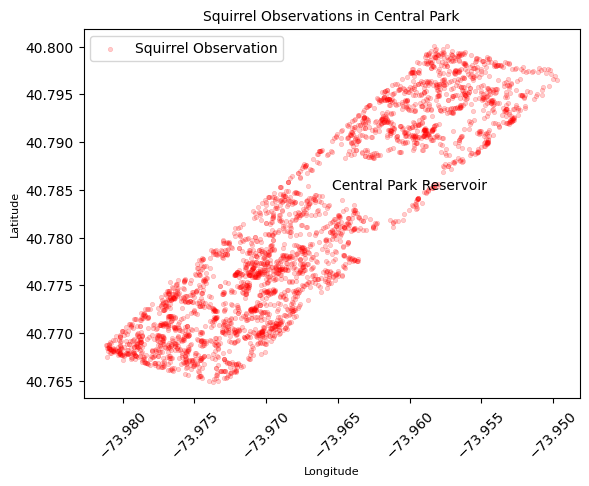

In [153]:
# create maplotlib scatterplot
plt.scatter(df['longitude'], df['latitude'], s=10, alpha=0.2, marker='o', color = 'red', linewidths=0.5, label='Squirrel Observation')

# add legend
plt.legend(loc='upper left')

# add titles and axis labels
plt.title('Squirrel Observations in Central Park',  fontsize = 10)
plt.xlabel('Longitude', fontsize =8)
plt.ylabel('Latitude', fontsize=8)

# modify x-axis ticks and labels
plt.xticks(rotation=45, ha='center')

# add annotations
plt.annotate('Central Park Reservoir', (-73.960, 40.785), ha='center')

# show the plot
plt.show()


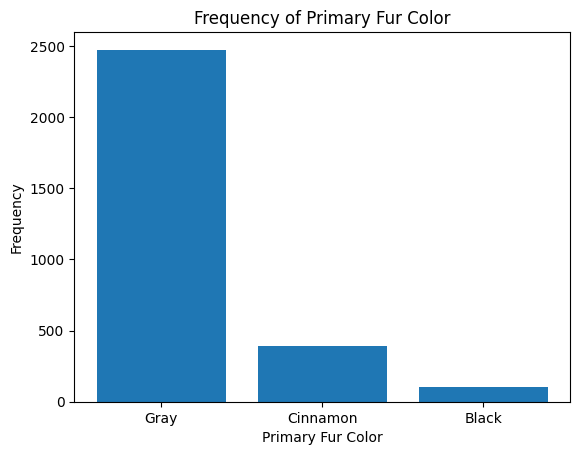

In [154]:
# create matplotlib bar plot 
counts = df['Primary Fur Color'].value_counts()
plt.bar(counts.index, counts.values)

# add labels and title
plt.xlabel('Primary Fur Color')
plt.ylabel('Frequency')
plt.title('Frequency of Primary Fur Color')

# display the plot
plt.show()

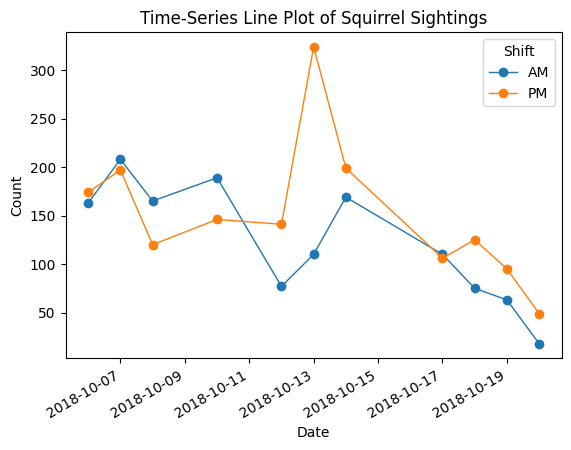

In [155]:
# create  matplotlib line plot - plots number of observation by date by shift

# group the data by 'Date' and 'Shift' columns and count the number of occurrences
counts = df.groupby(['Date', 'Shift']).size().reset_index(name='Count')

# pivot the 'Shift' column so that it becomes the columns in df
counts_pivot = counts.pivot(index='Date', columns='Shift', values='Count')

# create a line plot of the pivoted dataframe
counts_pivot.plot(marker='o', linewidth=1)

# add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time-Series Line Plot of Squirrel Sightings')

# display the plot
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  

**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

## Concentration of squirrels in Central Park

By plotting the longitude and latitude values of the dataset, the scatterplot indicates the location of squirrel observations.  By adjusting the alpha values, we can conclude that while squirrels were observed in all areas of Central Park, they were slightly less concentrated in the upper righ quadrant.  The lower left quadrant (representing the northern park border) appears to have had the most observations.

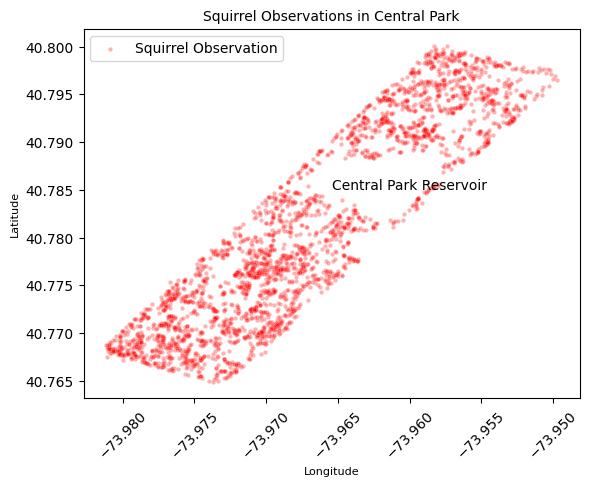

In [156]:
# create the seaborn scatterplot
sns.scatterplot(x='longitude', y='latitude', data=df, s=10, alpha=0.3, color='red', linewidths=0.5, label='Squirrel Observation')

# create a single legend for all subplots
plt.title('Squirrel Observations in Central Park', fontsize=10)
plt.xlabel('Longitude', fontsize=8)
plt.ylabel('Latitude', fontsize=8)

# modify x-axis ticks and labels
plt.xticks(rotation=45, ha='center')

# add annotations
plt.annotate('Central Park Reservoir', (-73.960, 40.785), ha='center')

# show the plot
plt.show()

## Primary Fur Color

Gray coated squirrels are the most commonly observed.  They are significantly represented over Cinnamon and Black squirrels.  

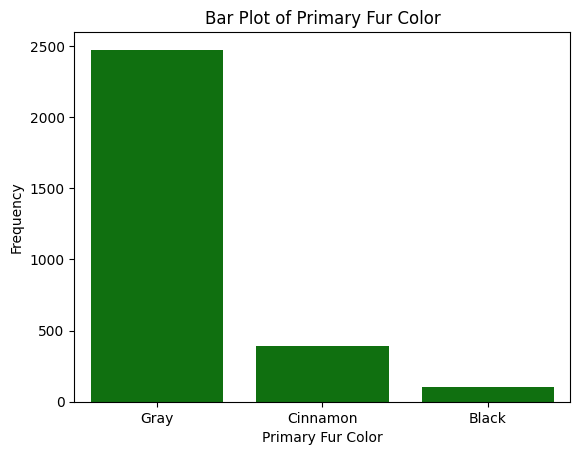

In [157]:
# Import seaborn
import seaborn as sns

# Create a bar plot of 'Primary Fur Color' column in 'df'
sns.countplot(x='Primary Fur Color', data=df, color='green')

# Add labels and title to the plot
plt.xlabel('Primary Fur Color')
plt.ylabel('Frequency')
plt.title('Bar Plot of Primary Fur Color')

# Display the plot
plt.show()

## AM vs PM Squirrel Observations

Squirrel observations in the morning (AM) and the afternoon (PM) were similar over the period of time except for a significant spike of PM observation on 10-13-2018.  Observations declined by the end of the period.  However, these differences may be diue to patterns of the observers rather than the squirrels.  For example, it may be that there were more observers available on this date to perform the census.


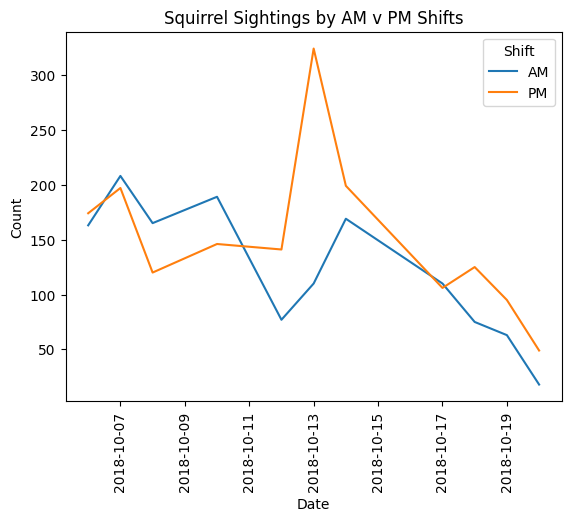

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Date' and 'Shift' columns and count the number of occurrences
counts = df.groupby(['Date', 'Shift']).size().reset_index(name='Count')

# Create a line plot of 'Count' and 'Date' columns in 'counts' dataframe
sns.lineplot(x='Date', y='Count', hue='Shift', data=counts)

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Squirrel Sightings by AM v PM Shifts')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()




### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Generally speaking, the seaborn plots required slightly less code than the matplotlib plots.  Specifically for the time series line graph, the matplotlib was significantly more difficult to code than it was in seaborn.  At least with these basic plots, labeling, titling and chart controls appeared to be equivalent.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

The raw data is likely to provide additional insight to squirrel behavior.  The challenging part was that all of the columns as captured in its raw format needs additional cleaning.  For example, the date values were converted to an int64 datetime datatype which had to be converted to string before being converted to a properly formatted datetime.  Each row/observation also contains a large number of Nan values for squirrel attributes behaviors captured in the census - which would need to be accounted for in the analysis.
